In [10]:
%pip install wbdata

Note: you may need to restart the kernel to use updated packages.


In [11]:
import wbdata


In [12]:
wbdata.search_countries("Botswana")

id    name
----  --------
BWA   Botswana

In [13]:
wbdata.get_country("BWA")

id    name
----  --------
BWA   Botswana

In [14]:
wbdata.get_source()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [15]:
gen_stats = 14
indicators_genstat = wbdata.get_indicator (source = gen_stats)
indicators_genstat

id                         name
-------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
account.t.d                Account (% age 15+)
account.t.d.1              Account, female (% age 15+)
account.t.d.2              Account, male (% age 15+)
borrow.any                 Borrowed any money (% age 15+)
borrow.any.1               Borrowed any money, female (% age 15+)
borrow.any.2               Borrowed any money, male (% age 15+)
fin1.1a                    First financial institution account ever was opened to receive a wage payment (% age 15+)
fin1.1ab                   First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)
fin1.1b                    First financial institution ever account was opened to receive money from the government (% age 15+)
fin1.t.d     

In [16]:
# this one is lit, holds condom use  and high risk sex 
# also death ranges 
health_nut = 16
indicators_healthnut = wbdata.get_indicator (source = health_nut)
indicators_healthnut

id                    name
--------------------  ----------------------------------------------------------------------------------------------------------------------------------------
HD.HCI.OVRL           Human Capital Index (HCI) (scale 0-1)
HD.HCI.OVRL.FE        Human Capital Index (HCI), Female (scale 0-1)
HD.HCI.OVRL.LB        Human Capital Index (HCI), Lower Bound (scale 0-1)
HD.HCI.OVRL.LB.FE     Human Capital Index (HCI), Female, Lower Bound (scale 0-1)
HD.HCI.OVRL.LB.MA     Human Capital Index (HCI), Male, Lower Bound (scale 0-1)
HD.HCI.OVRL.MA        Human Capital Index (HCI), Male (scale 0-1)
HD.HCI.OVRL.UB        Human Capital Index (HCI), Upper Bound (scale 0-1)
HD.HCI.OVRL.UB.FE     Human Capital Index (HCI), Female, Upper Bound (scale 0-1)
HD.HCI.OVRL.UB.MA     Human Capital Index (HCI), Male, Upper Bound (scale 0-1)
NY.GNP.PCAP.CD        GNI per capita, Atlas method (current US$)
SE.ADT.1524.LT.FM.ZS  Literacy rate, youth (ages 15-24), gender parity index (GPI)
SE.ADT

In [19]:
#aids death estimates 
aids_death = {"SH.DYN.AIDS.DH" : "BWA"}
aids = wbdata.get_dataframe(aids_death, country = "BWA")

aids.index = aids.index.astype(int)
aids

,BWA
date,
2022,NaN
2021,4600.0
2020,4800.0
2019,5100.0
2018,5000.0
...,...
1964,NaN
1963,NaN
1962,NaN


In [20]:
%pip install cufflinks # IF NECESSARY
import cufflinks as cf
cf.go_offline()

Note: you may need to restart the kernel to use updated packages.


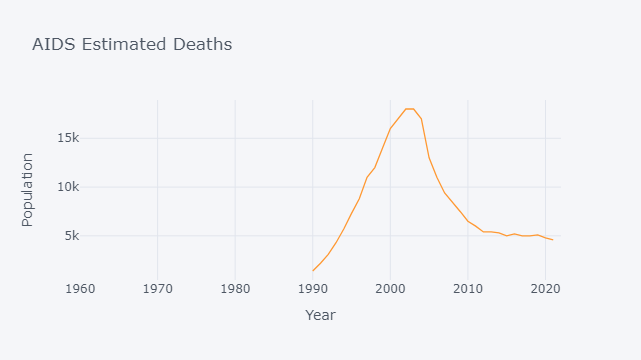

In [21]:
aids.iplot(title="AIDS Estimated Deaths",xTitle='Year',yTitle='Population')

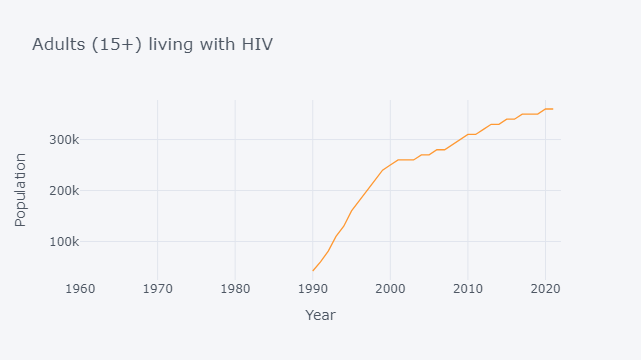

In [22]:
#Adults (15+) living w HIV
has_hiv= {"SH.DYN.AIDS" : "BWA"}
hiv = wbdata.get_dataframe(has_hiv, country = "BWA")

hiv.index = hiv.index.astype(int)
hiv.iplot(title="Adults (15+) living with HIV",xTitle='Year',yTitle='Population')

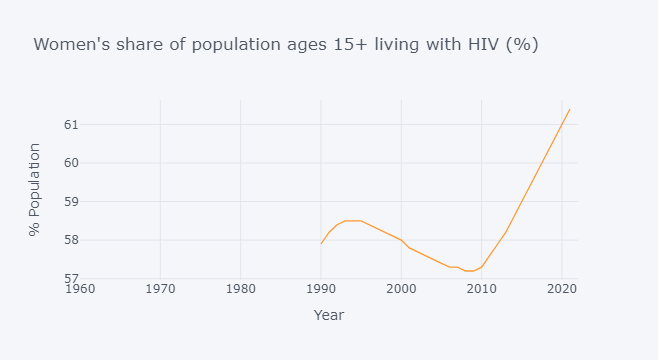

In [23]:
# Women's share of population ages 15+ living with HIV (%)
#SH.DYN.AIDS.FE.ZS
woman_hiv = {"SH.DYN.AIDS.FE.ZS" : "BWA"}
whiv = wbdata.get_dataframe(woman_hiv, country = "BWA")

whiv.index = whiv.index.astype(int)
whiv.iplot(title="Women's share of population ages 15+ living with HIV (%)",xTitle='Year',yTitle='% Population')

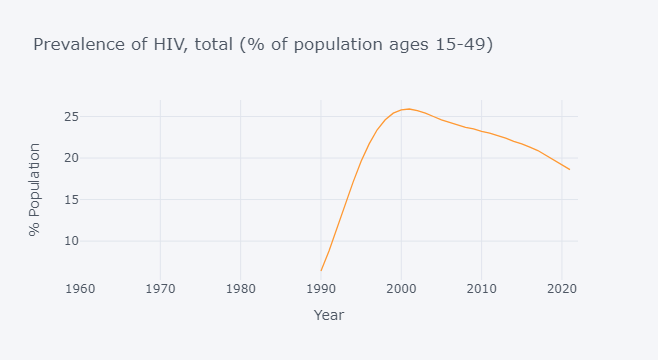

In [24]:
#SH.DYN.AIDS.ZS        Prevalence of HIV, total (% of population ages 15-49)
hiv_prev = {"SH.DYN.AIDS.ZS" : "BWA"}
prev = wbdata.get_dataframe(hiv_prev, country = "BWA")

prev.index = prev.index.astype(int)
prev.iplot(title ="Prevalence of HIV, total (% of population ages 15-49)",xTitle='Year',yTitle='% Population')

Males 0004      150033.0
Males 0509      143378.0
Males 1014      134270.0
Males 1519      119764.0
Males 2024      111166.0
Males 2529      112678.0
Males 3034      109632.0
Males 3539       99640.0
Males 4044       79951.0
Males 4549       57874.0
Males 5054       44020.0
Males 5559       33205.0
Males 6064       24387.0
Males 6569       16458.0
Males 7074        9612.0
Males 7579        5798.0
Males 80UP        4843.0
Females 0004    146162.0
Females 0509    139746.0
Females 1014    131076.0
Females 1519    117640.0
Females 2024    109699.0
Females 2529    111431.0
Females 3034    109624.0
Females 3539    102611.0
Females 4044     83636.0
Females 4549     61566.0
Females 5054     50099.0
Females 5559     40877.0
Females 6064     31884.0
Females 6569     22585.0
Females 7074     13784.0
Females 7579      8753.0
Females 80UP      8523.0
dtype: float64


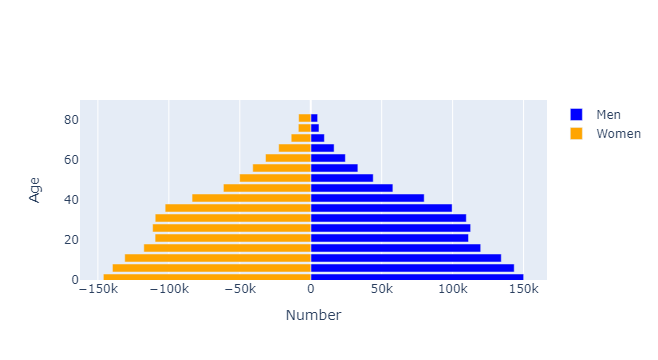

In [28]:
age_ranges = []

# Ranges top out at 80, and go in five year increments
for i in range(0,80,5):
    age_ranges.append(f"{i:02d}"+f"{i+4:02d}")

age_ranges.append("80UP")

male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}

variables = male_variables
variables.update(female_variables)

df = wbdata.get_dataframe(variables,country="BWA")
print(df.query("date=='2020'").sum(axis=0))

import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

py.init_notebook_mode(connected=True)

layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

year = 2020

bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='blue'),
               hoverinfo='skip'
               ),

        go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='orange'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

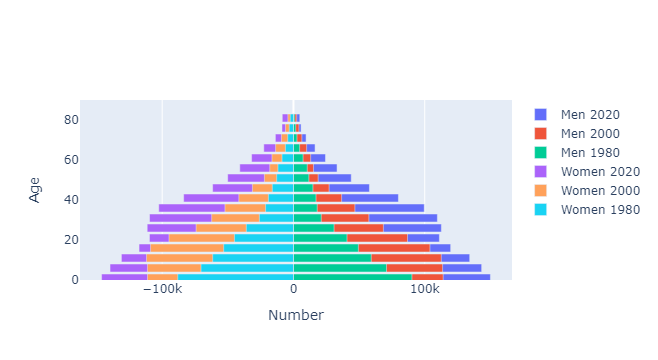

In [29]:
##I really want to ask about this one because I am unsure if by 10 years it adds on or if it is just the colored parts itself 
years = range(2020,1960,-20)

# This makes a list of graphs, year by year
bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men {:d}'.format(year),
               hoverinfo='skip'
              )
        for year in years]
          
bins += [go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
                y=[int(s[:2])+1 for s in age_ranges],
                orientation='h',
                name='Women {:d}'.format(year),
                hoverinfo='skip',
               )
         for year in years]

py.iplot(dict(data=bins, layout=layout))

In [38]:
#SH.HIV.1524.KW.FE.ZS  Comprehensive correct knowledge of HIV/AIDS, ages 15-24, female (2 prevent ways and reject 3 misconceptions)
#SH.HIV.1524.KW.MA.ZS  Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)
#indicators = {"SH.HIV.1524.KW.FE.ZS" : "Correct AIDS knowledge Female", "SH.HIV.1524.KW.MA.ZS" : "Correct AIDS knowledge Male"}

#data = wbdata.get_dataframe(indicators)
#data.reset_index(inplace=True)
#data['date'] = data['date'].astype(int)
#data.set_index(['country','date'],inplace=True)

#world = data.query("country=='Botswana'")
# Drop country index for World data
#bots.index = bots.index.droplevel('country')

#data[["Correct AIDS knowledge Male","Correct AIDS knowledge Female"]].iplot(title="Correct AIDS Knowledge Male vs Female")

In [ ]:
#SH.HIV.INCD.TL.P3     Incidence of HIV, all (per 1,000 uninfected population)

In [ ]:
#SH.HIV.ORPH           Children orphaned by HIV/AIDS

In [ ]:
#SH.MED.BEDS.ZS        Hospital beds (per 1,000 people)

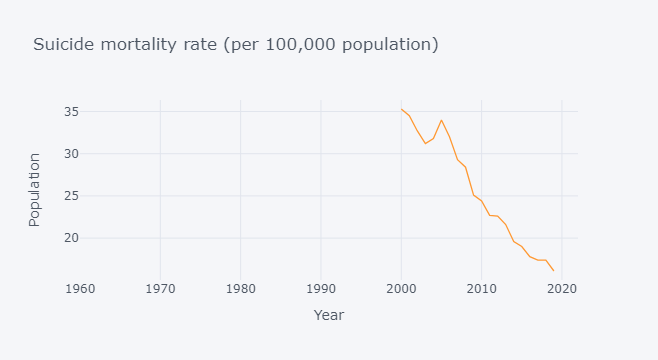

In [30]:
#SH.STA.SUIC.P5        Suicide mortality rate (per 100,000 population)
ss_rate= {"SH.STA.SUIC.P5" : "BWA"}
ss = wbdata.get_dataframe(ss_rate, country = "BWA")

ss.index = hiv.index.astype(int)
ss.iplot(title="Suicide mortality rate (per 100,000 population)",xTitle='Year',yTitle='Population')